In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import math

import utils

git_root_path = utils.get_git_root(os.getcwd())
viz_root_path = os.path.join(git_root_path, utils.VIZ_DIR_NAME)
data_path = os.path.join(git_root_path, utils.DATA_DIR_NAME)

training_csv_path = os.path.join(data_path, utils.TRAINING_FILENAME + "." + utils.INPUT_DATA_FORMAT)

In [ ]:
# def pv_and_consumption():
    
#     training_df = pd.read_csv(training_csv_path, sep = ";")
#     training_df["timestamp"] = pd.to_datetime(training_df["timestamp"])
    
#     sites = training_df["site_id"].unique()
    
#     for site in sites:
#         pv_and_consumption_by_site(training_df, site)
        
# def pv_and_consumption_by_site(df, site):
    
#     site_df = df[df["site_id"] == site]
#     site_df = site_df.sort_values("timestamp")
#     site_df = site_df.set_index("timestamp")
    
#     periods = site_df["period_id"].unique()
    
#     print("site ID {}".format(site))
#     print(periods)
#     for period in periods:
#         pv_and_consumption_by_period(site_df, site, period)
    
# def pv_and_consumption_by_period(df, site, period):
    
#     period_df = df[df["period_id"] == period]
#     num_weeks = math.ceil((max(period_df.index) - min(period_df.index)).days / 7)
    
#     start_timestamp = min(period_df.index)
#     print("-- period ID {}".format(period))
    
#     fig_height = 4 * num_weeks
#     sns.set(rc={'figure.figsize':(14, fig_height)})
    
#     fig = plt.figure()
#     #fig.subplots_adjust(top = 2.0)
#     for i in range(1, num_weeks + 1):
#         start_dt_str = start_timestamp.strftime('%m-%d-%Y')
#         end_dt_str = (start_timestamp + timedelta(days=7)).strftime('%m-%d-%Y')
#         weekly_df = period_df[(period_df.index >= start_timestamp) \
#             & (period_df.index < start_timestamp + timedelta(days=7))]
        
#         weekly_plot = fig.add_subplot(num_weeks, 1, i)
#         weekly_plot = plt.plot('actual_consumption', data=weekly_df, linewidth=1, label="Load")
#         weekly_plot = plt.plot('actual_pv', data=weekly_df, linewidth=1, label="PV")
#         weekly_plot = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
#         weekly_plot = plt.title("Site ID: {site} / Period ID: {period} \n{start_dt_str} - {end_dt_str}".format(**locals()))
#         fig.subplots_adjust(hspace = 0.5)
#         del(weekly_plot)
        
#         start_timestamp = start_timestamp + timedelta(days=7)
        
#     #fig.subplots_adjust(top = 2.0)
#     viz_dir = os.path.join(viz_root_path, str(site), "pv_and_consumption", "")
#     filename = "Period {}.png".format(period)
#     if not os.path.exists(viz_dir):
#         os.makedirs(viz_dir)
            
#     fig.savefig(os.path.join(viz_dir, filename))
#     plt.close(fig)
#     while start_timestamp < max(period_df.index):
        
#         start_dt_str = start_timestamp.strftime('%m-%d-%Y')
#         print("---- start time {}".format(start_dt_str))
#         end_dt_str = (start_timestamp + timedelta(days=7)).strftime('%m-%d-%Y')
#         weekly_df = period_df[(period_df.index >= start_timestamp) \
#             & (period_df.index < start_timestamp + timedelta(days=7))]
        
#         #print(weekly_df.head())
#         #print(weekly_df.tail())
#         weekly_plot = plt.plot('actual_consumption', data=weekly_df, linewidth=1, label="Load")
#         weekly_plot = plt.plot('actual_pv', data=weekly_df, linewidth=1, label="PV")
#         weekly_plot = plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
#         weekly_plot = plt.title("Site ID: {site} / Period ID: {period} \n{start_dt_str} - {end_dt_str}".format(**locals()))
        
#         fig.subplots_adjust(top = 2.0)
#         viz_dir = os.path.join(viz_root_path, str(site), "pv_and_consumption", str(period), "")
#         filename = "{start_dt_str} - {end_dt_str}.png".format(**locals())
#         if not os.path.exists(viz_dir):
#             os.makedirs(viz_dir)
#         weekly_plot.figure.savefig(os.path.join(viz_dir, filename))
#         plt.close(weekly_plot.figure)
#         start_timestamp = start_timestamp + timedelta(days=7)
#         print("changing start time to {}".format(start_timestamp))
        
    print("\n")

In [10]:
training_df = pd.read_csv(training_csv_path, sep = ";")
training_df["timestamp"] = pd.to_datetime(training_df["timestamp"])

In [118]:
site = 29
period = 1
site_df = training_df[training_df["site_id"] == site]
period_df = site_df[site_df["period_id"] == period]

period_df = period_df.sort_values("timestamp")
period_df = period_df.set_index("timestamp")
df = period_df
num_viz = 3
viz_duration = (max(df.index) - min(df.index)) / num_viz
start_timestamp = min(df.index)
sns.set(rc={'figure.figsize':(utils.VIZ_DEFAULT_WIDTH, utils.VIZ_DEFAULT_HEIGHT)})

['actual_pv', 'actual_consumption']
36833.931458741434


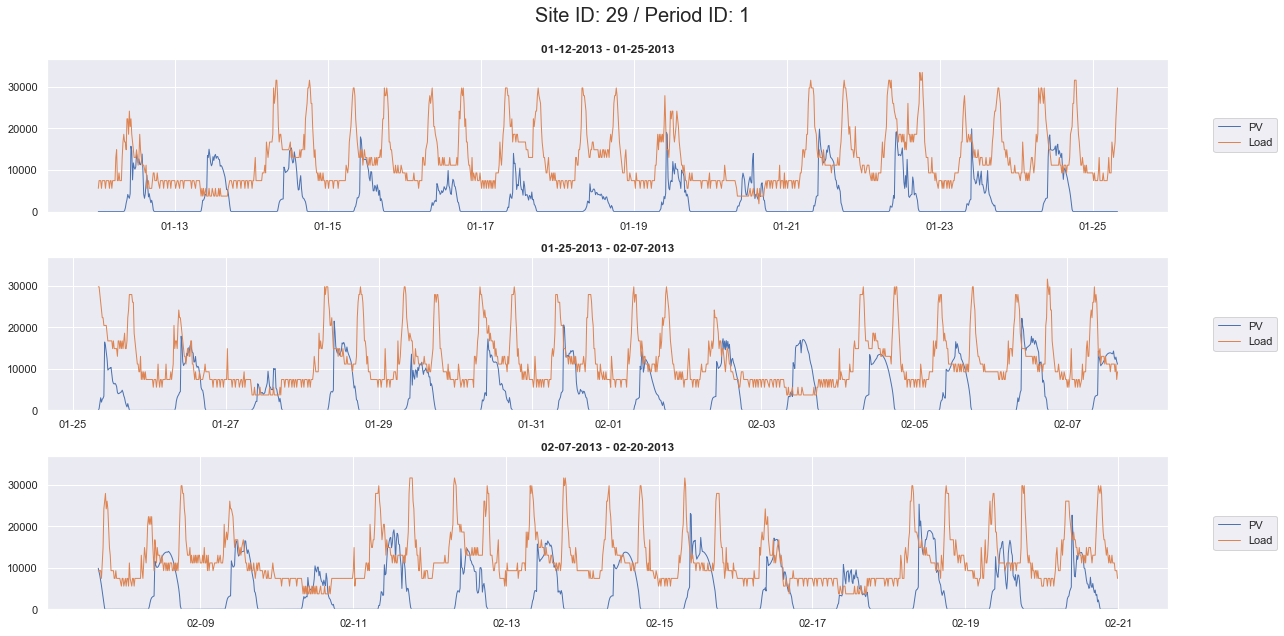

In [119]:
import matplotlib.dates as mdates
viz_dir = os.path.join(viz_root_path, "energy_balance", "Site {}".format(site), "")
filename = "Period {}.png".format(period)

plot_cols = [{"actual_pv": "PV"}, {"actual_consumption" : "Load"}]
#plot_cols = [{"price_buy_00": "Buy"}, {"price_sell_00" : "Sell"}]
df_cols = [list(col.keys())[0] for col in plot_cols] # get list of keys -- which are col names in df 
print(df_cols)
y_max = df[df_cols].max().max()
y_max = y_max + (y_max * .1)
print(y_max)

fig = plt.figure()
for i in range(1, num_viz + 1):
    start_dt_str = start_timestamp.strftime('%m-%d-%Y')
    end_dt_str = (start_timestamp + timedelta(days=viz_duration.days, seconds = viz_duration.seconds)).strftime('%m-%d-%Y')
    if i == num_viz:
        viz_df = df[df.index >= start_timestamp]
    else:
        viz_df = df[(df.index >= start_timestamp) \
             & (df.index < start_timestamp + timedelta(days=viz_duration.days, seconds = viz_duration.seconds))]
    
    subplot = fig.add_subplot(num_viz, 1, i)
    subplot.set_ylim([0,y_max])
    
    #subplot.xaxis.set_minor_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
    for col_dict in plot_cols:
            
        col_name = str(list(col_dict)[0])
        friendly_name = str(col_dict[col_name])
        plt.plot(col_name, data=viz_df, linewidth=1, label=friendly_name)
        #weekly_plot = plt.plot('actual_pv', data=weekly_df, linewidth=1, label="PV")
        
    #subplot.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
    subplot.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.suptitle("Site ID: {site} / Period ID: {period}".format(**locals()), fontsize=20)
    plt.title("{start_dt_str} - {end_dt_str}".format(**locals()), fontdict={"fontweight": "bold"})
    plt.tight_layout()
    fig.subplots_adjust(top = 0.9, hspace = 0.3)
    start_timestamp = start_timestamp + timedelta(days=viz_duration.days, seconds=viz_duration.seconds)


,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,price_sell_86,price_sell_87,price_sell_88,price_sell_89,price_sell_90,price_sell_91,price_sell_92,price_sell_93,price_sell_94,price_sell_95
438607,2013-12-17 23:45:00,10,6,174178.987462,0.0,172521.991969,168127.019101,170711.881978,171558.001933,174748.408983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78522,2013-12-18 00:00:00,10,6,169824.512776,0.0,164858.218725,167032.897485,167584.522828,170563.495372,173523.609718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181529,2013-12-18 00:15:00,10,6,171457.440783,0.0,171712.355564,170885.672668,172875.078983,175124.727198,182840.564092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209554,2013-12-18 00:30:00,10,6,167102.966096,0.0,167108.191518,169694.872343,172373.338051,180397.047521,172971.788586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239080,2013-12-18 00:45:00,10,6,168191.584768,0.0,172327.339442,176117.973766,184940.172625,178088.194840,168989.962672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
viz_duration = (max(df.index) - min(df.index)) / num_viz
viz_duration_days = viz_duration.days
viz_duration

Timedelta('13 days 07:55:00')

In [31]:
viz_duration.seconds % 3600

3300

In [32]:
3300 / 60

55.0